In [2]:
import sys 
sys.path.append("..")

In [3]:
import os
from data.info import InfoData
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
env = "superpc"
# env = "nitlab"

# Patients Table

In [4]:
data = InfoData(env=env)
patients_csv_path = os.path.join(data.mimiciv_directory_path, "hosp", "patients.csv")
# print(patient_csv_path)
df_patients = pd.read_csv(patients_csv_path)
display(df_patients)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13
...,...,...,...,...,...,...
364622,19999828,F,46,2147,2017 - 2019,NaN
364623,19999829,F,28,2186,2008 - 2010,NaN
364624,19999840,M,58,2164,2008 - 2010,2164-09-17
364625,19999914,F,49,2158,2017 - 2019,NaN


In [5]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364627 entries, 0 to 364626
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   subject_id         364627 non-null  int64 
 1   gender             364627 non-null  object
 2   anchor_age         364627 non-null  int64 
 3   anchor_year        364627 non-null  int64 
 4   anchor_year_group  364627 non-null  object
 5   dod                38301 non-null   object
dtypes: int64(3), object(3)
memory usage: 16.7+ MB


In [6]:
patients_gender = df_patients["gender"].value_counts()

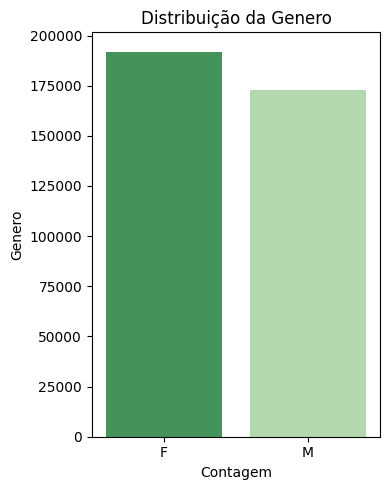

In [7]:
plt.figure(figsize=(4,5))
sns.barplot(x=patients_gender.index, y=patients_gender.values, hue=patients_gender.index, palette='Greens_r', dodge=False, legend=False)
plt.title('Distribuição da Genero')
plt.xlabel('Contagem')
plt.ylabel('Genero')
plt.tight_layout()
plt.show()

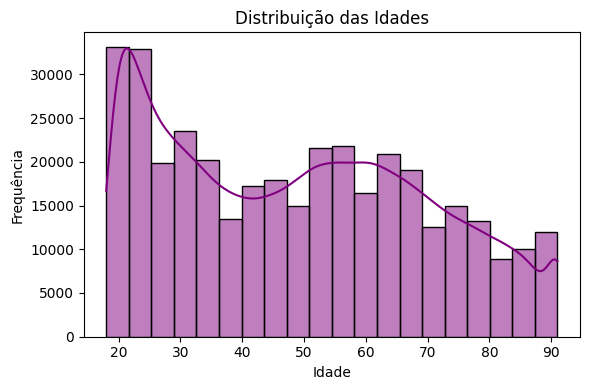

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df_patients['anchor_age'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

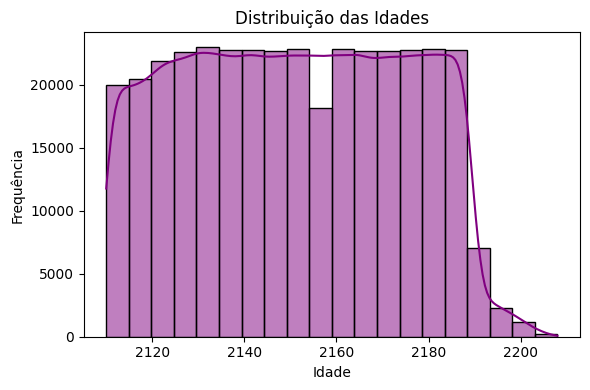

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df_patients['anchor_year'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

In [ ]:
"como calcular o tempo decorrido entre o ano de admissão e o dia da morte"

# Diagnoses Table (d_icd_diagnoses)

In [20]:
data = InfoData(env=env)
d_diagnoses_csv_path = os.path.join(data.mimiciv_directory_path, "hosp", "d_icd_diagnoses.csv")
diagnoses_csv_path = os.path.join(data.mimiciv_directory_path, "hosp", "diagnoses_icd.csv")
# print(patient_csv_path)
df_d_diagnoses = pd.read_csv(d_diagnoses_csv_path)
df_diagnoses = pd.read_csv(diagnoses_csv_path)


In [21]:
display(df_d_diagnoses)

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
112102,Z992,10,Dependence on renal dialysis
112103,Z993,10,Dependence on wheelchair
112104,Z998,10,Dependence on other enabling machines and devices
112105,Z9981,10,Dependence on supplemental oxygen


In [22]:
display(df_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
6364515,19999987,23865745,7,41401,9
6364516,19999987,23865745,8,78039,9
6364517,19999987,23865745,9,0413,9
6364518,19999987,23865745,10,36846,9


In [23]:
df_diagnoses_v9 = df_diagnoses[df_diagnoses["icd_version"] == 9]
df_diagnoses_v10 = df_diagnoses[df_diagnoses["icd_version"] == 10]

In [37]:
display(df_diagnoses_v10)

,subject_id,hadm_id,seq_num,icd_code,icd_version
40,10000084,23052089,1,G3183,10
41,10000084,23052089,2,F0280,10
42,10000084,23052089,3,R441,10
43,10000084,23052089,4,R296,10
44,10000084,23052089,5,E785,10
...,...,...,...,...,...
6364485,19999828,29734428,18,Z9049,10
6364486,19999828,29734428,19,Z87891,10
6364487,19999828,29734428,20,B9620,10
6364488,19999828,29734428,21,Z1611,10


In [32]:
df_diagnoses_v9_count = df_diagnoses_v9["icd_code"].value_counts()
df_diagnoses_v9_count.index = [df_d_diagnoses.loc[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_v9_count.index]
print(len(df_diagnoses_v9_count.index))

9143


In [33]:
display(df_diagnoses_v9_count)

Unspecified essential hypertension                                                                            102368
Other and unspecified hyperlipidemia                                                                           67293
Esophageal reflux                                                                                              48628
Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled     43077
Atrial fibrillation                                                                                            37070
                                                                                                               ...  
Polyarticular juvenile rheumatoid arthritis, acute                                                                 1
Activity involving exercise machines primarily for muscle strengthening                                            1
Syphilitic optic atrophy                                        

In [35]:
df_diagnoses_v10_count = df_diagnoses_v10["icd_code"].value_counts()
df_diagnoses_v10_count.index = [df_d_diagnoses.loc[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_v10_count.index]
print(len(df_diagnoses_v10_count.index))

19440


In [36]:
display(df_diagnoses_v10_count)

Hyperlipidemia, unspecified                                                         84571
Essential (primary) hypertension                                                    83776
Personal history of nicotine dependence                                             62806
Gastro-esophageal reflux disease without esophagitis                                56159
Major depressive disorder, single episode, unspecified                              41876
                                                                                    ...  
Spontaneous rupture of flexor tendons, left forearm                                     1
Laceration with foreign body of oral cavity, initial encounter                          1
Other infective spondylopathies, thoracolumbar region                                   1
Poisoning by vitamins, accidental (unintentional), initial encounter                    1
Maternal care for (suspected) fetal abnormality and damage, unspecified, fetus 2        1
Name: coun

In [39]:
of_interest_list = ["F" + str(n) for n in range(20, 40)]
of_interest_list

['F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30',
 'F31',
 'F32',
 'F33',
 'F34',
 'F35',
 'F36',
 'F37',
 'F38',
 'F39']

In [41]:
df_diagnoses_of_interest = df_diagnoses_v10.loc[df_diagnoses_v10["icd_code"].isin(of_interest_list)]

In [43]:
df_diagnoses_of_interest_count = df_diagnoses_of_interest["icd_code"].value_counts()
df_diagnoses_of_interest_count.index = [df_d_diagnoses[df_d_diagnoses["icd_code"] == index]["long_title"].values[0] for index in df_diagnoses_of_interest_count.index]
print(len(df_diagnoses_of_interest_count.index))

6


C:\Users\lucas\AppData\Local\Temp\ipykernel_19008\1611789205.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


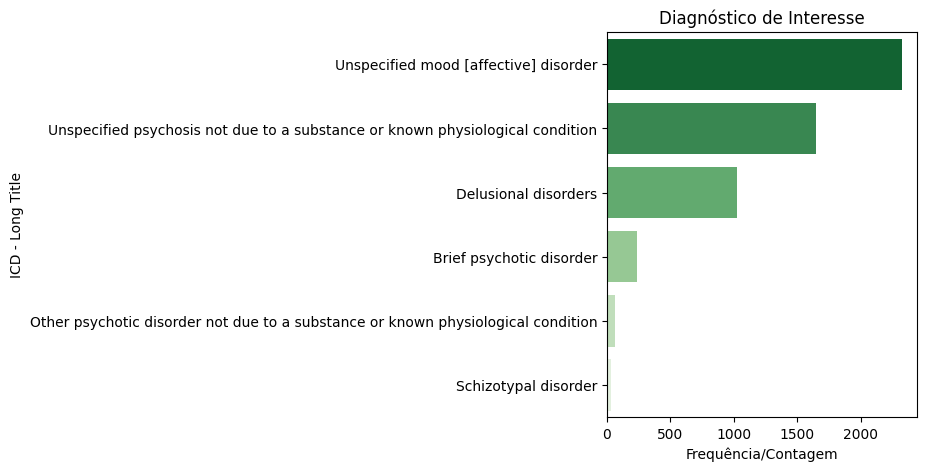

In [47]:
plt.figure(figsize=(4,5))
sns.barplot(x=df_diagnoses_of_interest_count.values, y=df_diagnoses_of_interest_count.index, hue=df_diagnoses_of_interest_count.index, palette='Greens_r', dodge=False, legend=False, orient="h")
plt.title('Diagnóstico de Interesse')
plt.xlabel('Frequência/Contagem')
plt.ylabel('ICD - Long Title')
plt.tight_layout()
plt.show()